### RFC

### import modules and configure notebook

In [4]:
import pandas as pd
import numpy as np
import swifter
import seaborn as sns
import matplotlib.pyplot

pd.set_option('max.rows', None)
pd.set_option('max.columns', None)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score, f1_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

### Load variables stored by data_preproccessing notebook

In [5]:
%store -r train_data
%store -r test_data
%store -r my_data
%store -r uniques


### Turn feature data and class to be predicited into numpy arrays

In [6]:
pre_X = np.array(train_data[my_data.columns.values[9:-1]])
y = np.array(train_data['class'])

In [7]:
my_poly_vars = PolynomialFeatures(2)
X = my_poly_vars.fit_transform(pre_X)


### Carry out 10-f0ld stratified cross validation, class f1 scores and macro f1 scores with weighted averages are calculated

In [8]:
RFC = RandomForestClassifier(n_estimators=800)
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
class_f1_scores = []
macro_f1_scores = []
accuracy_scores = []
feat_imp =[]
f1_dict = {}
feat_imp_dict = {}
count = 0
for train_index, test_index in skf.split(X, y):
    count = count + 1
    print('making model:')
    key = 'round' + str(count)
    print(count)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    y_pred_proba = RFC.predict_proba(X_test)
    class_f1_scores = f1_score(y_test, y_pred, average = None)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    macro_f1_scores.append(f1_score(y_test, y_pred, average = 'weighted'))
    f1_dict[key] = class_f1_scores 
    feat_imp_dict[key] = RFC.feature_importances_

making model:
1
making model:
2


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
3


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
4


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
5
making model:
6


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
7


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
8
making model:
9
making model:
10


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
f1_df = pd.DataFrame(data = f1_dict)


### Below are the encodings for the class variable

In [10]:
print(train_data['class'].unique())
print(list(uniques))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
['FH', 'ER', 'WW', 'TC', 'BC_CS', 'KQ', 'AR', 'SL', 'FG', 'WB_BX', 'PF', 'BM', 'WH', 'SQ_BP', 'WN', 'BH', 'PH', 'LB', 'PC', 'SV_SE', 'BA', 'WA', 'MM']


In [11]:
f1_df_final = pd.concat([f1_df, pd.Series(uniques)], axis = 1)

In [12]:
f1_df_final.rename(columns={0:'class'}, inplace=True)
f1_df_final.set_index('class', drop = True, inplace = True)

### Boxplot showing the distribution of class f1 scores from 10 models

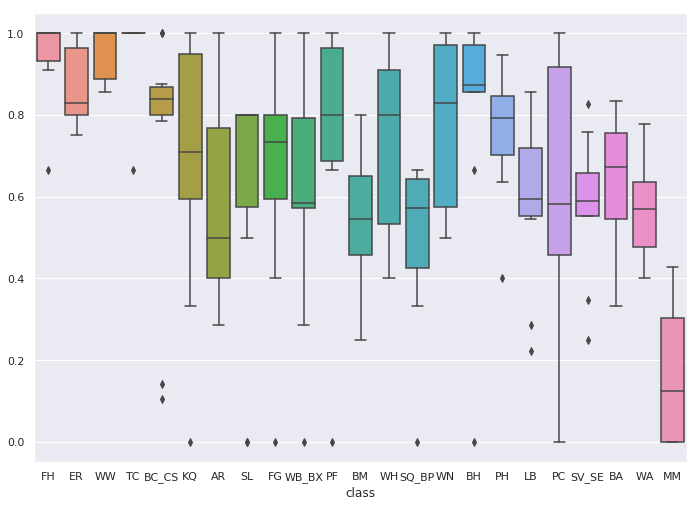

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data = f1_df_final.T)

### Boxplot showing the macro F1 score with weighted averages

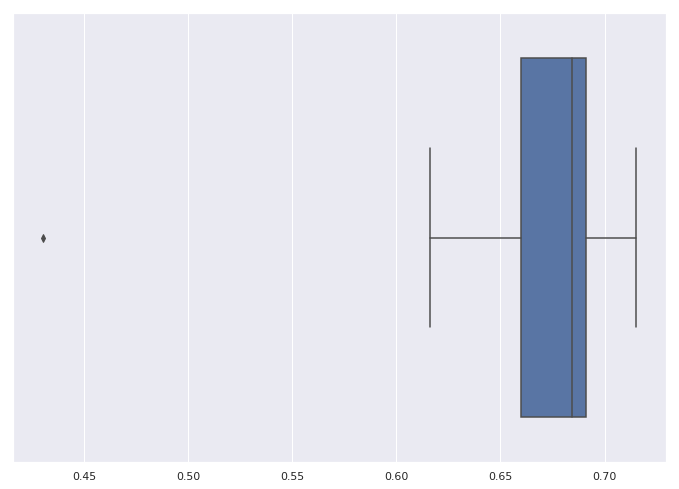

In [14]:
sns.boxplot(macro_f1_scores)

### Boxplot showing accuracy scores

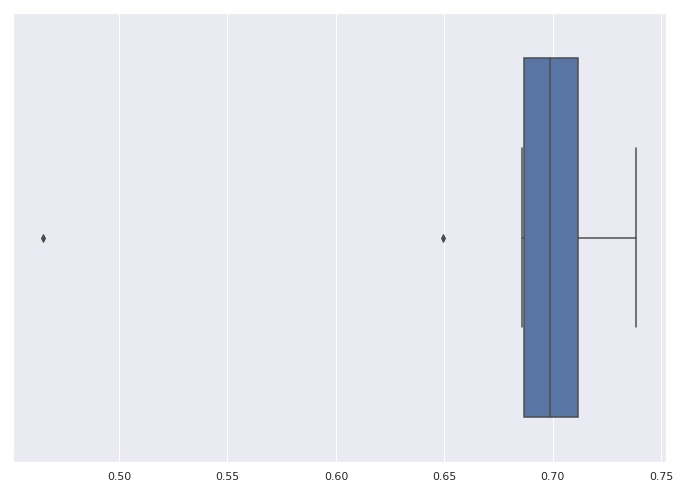

In [15]:
sns.boxplot(accuracy_scores)

### Get feature importances

In [16]:
feat_imp_df = pd.DataFrame(data = feat_imp_dict)
feat_imp_df.head()

,round1,round2,round3,round4,round5,round6,round7,round8,round9,round10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000884,0.000950,0.000898,0.001051,0.000855,0.000931,0.001042,0.000944,0.000794,0.001071
2,0.000172,0.000157,0.000168,0.000231,0.000221,0.000171,0.000134,0.000182,0.000253,0.000192
3,0.002768,0.003199,0.003105,0.003070,0.002990,0.002787,0.002544,0.002985,0.003055,0.003057
4,0.003021,0.002849,0.003638,0.003292,0.003383,0.003118,0.002840,0.002592,0.002686,0.002650


feat_imp_df_final = pd.concat([feat_imp_df, pd.Series(my_data[my_data.columns.values[9:-1]].columns.values)], axis = 1)
feat_imp_df_final.rename(columns = {0:'element'}, inplace = True )
feat_imp_df_final.head()

feat_imp_df_final.set_index('element', inplace=True)


feat_imp_df_final_plot = feat_imp_df_final.T

feat_imp_df_final_plot

elements = feat_imp_df_final_plot.columns.values 
mean_feature_importance = []
for col in list(feat_imp_df_final_plot.columns.values):
    mean_feature_importance.append(feat_imp_df_final_plot[col].mean())
    

mean_feature_importance_df = pd.concat([pd.Series(elements), pd.Series(mean_feature_importance)], axis = 1)

mean_feature_importance_df.rename(columns={0:'elements', 1:'mean_importance'}, inplace=True)

mean_feature_importance_df.sort_values(by='mean_importance', ascending=False, inplace=True)

### Barchart showing feture importances

sns.set(rc={'figure.figsize':(20,20)})
plot = sns.barplot(data = mean_feature_importance_df, x = 'elements', y = 'mean_importance')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plot
fig = plot.get_figure()
fig.savefig("output.png")

### Model is built for predicting source of artefacts 

In [17]:
RFC_final = RandomForestClassifier(n_estimators=800)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
RFC_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
print(train_data['class'].unique())
print(uniques)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Index(['FH', 'ER', 'WW', 'TC', 'BC_CS', 'KQ', 'AR', 'SL', 'FG', 'WB_BX', 'PF',
       'BM', 'WH', 'SQ_BP', 'WN', 'BH', 'PH', 'LB', 'PC', 'SV_SE', 'BA', 'WA',
       'MM'],
      dtype='object')


In [21]:
df_for_identifiers = test_data.copy(deep = True)
identifiers =  df_for_identifiers['Analysis']

### Predictions are made for the artefacts

In [22]:
my_poly_var_pred = PolynomialFeatures(2)
pre_X_unknown = np.array(test_data[test_data.columns.values[8:-1]])
X_unknown = my_poly_var_pred.fit_transform(pre_X_unknown)

In [23]:
y_pred = RFC_final.predict(X_unknown)

In [24]:
final_pred_df = pd.concat([pd.Series(y_pred), pd.Series(list(identifiers))], axis = 1)

In [25]:
final_pred_df.rename(columns={0:'class_number'}, inplace = True)

In [26]:
final_pred_df.head()

,class_number,1
0,19,06_DH1_1
1,19,07_DH1_2
2,19,08_DH1_3
3,19,09_DH2_1
4,19,10_DH2_2


In [27]:
uniques_list = list(uniques)
def get_pred_names(row):
    return(uniques_list[row['class_number']])
final_pred_df['class_predictions'] = final_pred_df.apply(get_pred_names, axis = 1)

In [28]:
final_pred_df.rename(columns = {1 : 'analysis_identifier'}, inplace = True)